# Compulsory Assignment 1 - Pandas and visualizations
#### Karin Mollatt

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
## Loading and exploring the dataset

__1. Load the dataset named `airbnb.csv` and store it in a dataframe called `raw_df`. Use the column named `ìd` as the index column for the dataframe__

In [2]:
# loading dataset and setting `id` as index column
raw_df = pd.read_csv('assets/airbnb.csv', index_col = 'id')

__2. Print the first `five` rows of the dataframe__

In [3]:
# printing first five rows of dataframe
raw_df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles
109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles
51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles
184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles
51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles


__3. How many unique values exist in each of the columns `state` and `city`?__

In [4]:
# no of unique values of columns `state` and `city`
unique_state = raw_df['state'].unique()
unique_city = raw_df['city'].unique()

print(f'\nNo. of unique values for `state`: {len(unique_state)}')
print(f'\nNo. of unique values for `city`: {len(unique_city)}')



No. of unique values for `state`: 19

No. of unique values for `city`: 31


__4. Identify missing (NaN) values in each of the columns in the dataset__

In [20]:
# summing up no. of missing values for each column

#for col in raw_df:
#    sum_of_nan = raw_df[col].isna().sum()
#    print(f'Sum of missing values in {col}: {sum_of_nan}')
    
df_sum_of_nan = raw_df.isna().sum()
print(f'Sum of missing values:\n{df_sum_of_nan}')

Sum of missing values:
name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64


__5. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values?__

In [6]:
# making copy, and showing shape before removing missing values
df = raw_df.copy()
print(f'Shape of dataframe with missing values: {df.shape}')

# removing missing values
df = df.dropna()
print(f'Shape of dataframe without missing values: {df.shape}')

# rows removed
print(f'Rows removed: {raw_df.shape[0] - df.shape[0]}')

Shape of dataframe with missing values: (325858, 15)
Shape of dataframe without missing values: (323983, 15)
Rows removed: 1875


__6. Which `room_type`, `state` and `city` is the most popular (by number of instances)? Print the name and count of each__

Hint: The output should look something like this:
```python
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
```

In [7]:
# making a list of columns to check
cols = ['room_type', 'state', 'city']

# iterating over each column, fetching the most popular variable and its count in 
# two variables
for col in cols:
    most_pop = df[col].value_counts().index[0]
    most_pop_count = df[col].value_counts()[0]
    print(f'Column: {col}, Most popular: {most_pop}, Count: {most_pop_count}')

Column: room_type, Most popular: Entire home/apt, Count: 241433
Column: state, Most popular: CA, Count: 127206
Column: city, Most popular: Los Angeles, Count: 91600


__7. What is the average and median `price` for a listing?__

In [8]:
# computing mean and median over `price` column
mean_price = df.price.mean()
median_price = df.price.median()

print(f'Average price for a listing: {mean_price: .3f}')
print(f'Median price for a listing: {median_price}')

Average price for a listing:  285.125
Median price for a listing: 159.0


__8. What is the average price for the states `CA`, `FL` and `NY`?__

Hint: The output should look something like this:
```python
State: [col], Average price: [price]
State: [col], Average price: [price]
State: [col], Average price: [price]
```

In [9]:
# list of states
states_to_check = ['CA', 'FL', 'NY']

# iterating over all states, selecting rows of the state and 
# applying the mean to the `price` column
for state_name in states_to_check:
    state_df = df.loc[df.state == state_name]
    mean_state_price = state_df.price.mean()
    print(f'State: {state_name}, Average price: {mean_state_price: .3f}')

State: CA, Average price:  288.395
State: FL, Average price:  241.987
State: NY, Average price:  197.219


__9. Create a new dataframe called `df_beach` containing all listings with "beach" in the `name`. Print out the shape of `beach_df`__

The filtering should not be case sensitive, meaning that names containing `beach`, `Beach`, `BeAcH` etc. all should be included


In [10]:
# choosing only rows that includes beach in any written letter form
df_beach = df[df.name.str.contains(pat = 'beach', case = False)]
# checking first 5 lines
df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles
109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles
51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles
184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles
51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles


---

## Visualizing the dataset

__10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.__

Use `df` in all tasks in this section

Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/ex10.png"
     alt="Barchart example"/>

PS: Disregard the color scheme of the example image.


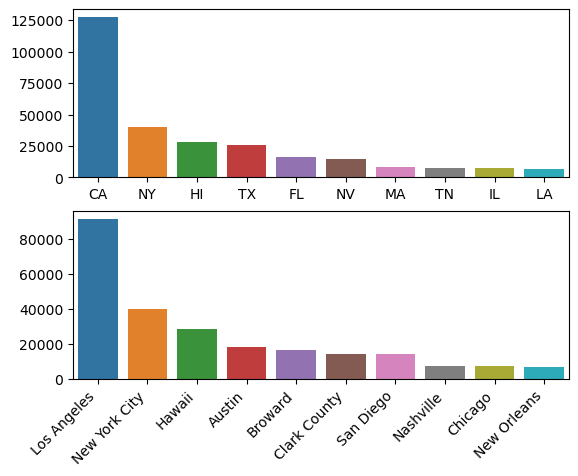

In [11]:
# creating plotting area (2x1 array)
fig, ax = plt.subplots(2, 1)

# state plot
state_barplot = sns.barplot(x = df.state.value_counts().index[0:10],
                            y = df.state.value_counts()[0:10],
                            ax = ax[0])
state_barplot.set(ylabel='') # removing `state` label from y axis

# city plot
city_barplot = sns.barplot(x = df.city.value_counts().index[0:10],
                           y = df.city.value_counts()[0:10],
                           ax = ax[1])
city_barplot.set_xticklabels(df.city.value_counts().index[0:10],
                             rotation=45,
                             ha='right') # tilting x-labels for readability
city_barplot.set(ylabel='')  # removing `city` label from y axis
plt.show()

__11. Create a scatterplot with the longitude and latitude of the listings in `df`. Longitude should be on the x-axis and latitude on the y-axis.__ 

The output should look something like this:

<img src="assets/ex11.png"
     alt="Scatterplot example"/>

PS: Disregard the color scheme of the example image.

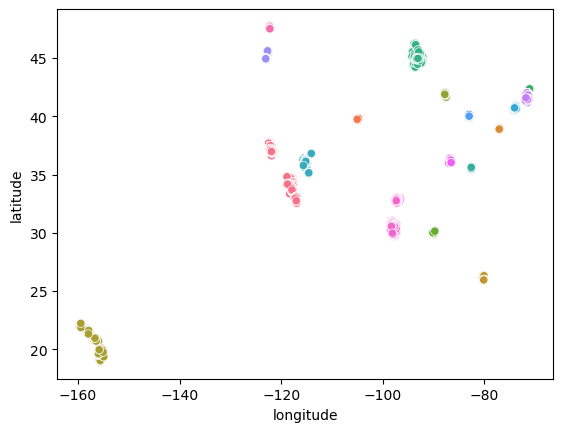

In [12]:
# scatterplot
plt.figure()
scat_plot = sns.scatterplot(x = 'longitude',
                            y = 'latitude',
                            data = df,
                            hue = 'state',
                            legend = False)
plt.show()

__12. Create a matrix containing the correlations between the different columns in `df`. Plot it as a heatmap using Seaborn or similar. What does the plot tell you about correlations? Which columns are the most correlated to `price`?__

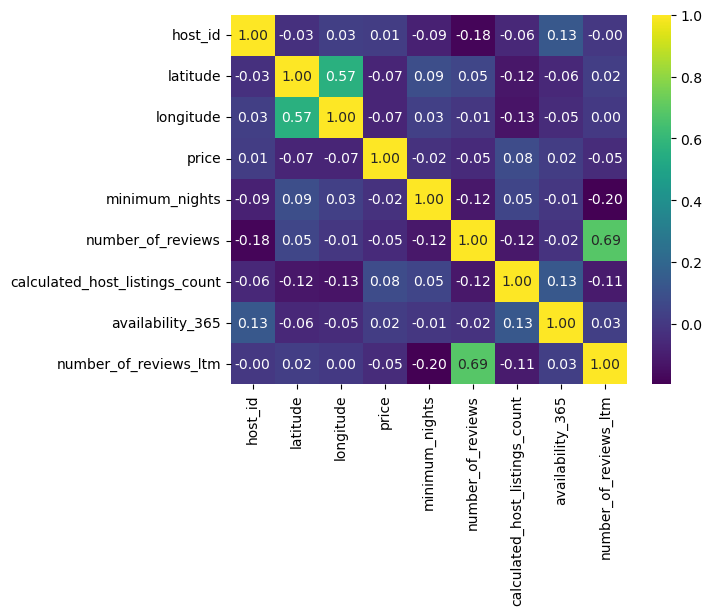

In [13]:
# correlation matrix
cor_matrix = df.corr()

# heatmap showing correlations with 2 decimals
plt.figure()
heatmap_plot = sns.heatmap(cor_matrix, cmap='viridis',
                           annot=True, fmt='.2f')
plt.show()

- *What does the plot tell about correlations?*
    - The plot shows two correlations that differentiates from the rest. These correlations are between `longitude` and `latitude`, and between `number_of_reviews`and `number_of_reviews_ltm`. Longitude and latitude obviously have a correlation because these describe the position of the listing together. The same goes for `number_of_reviews`and `number_of_reviews_ltm` because the only difference between these two is that the last feature is restricted to containing only reviews from the previous year (ltm = last twelve months).
    
- *Which columns are the most correlated to `price`?*
    - Out of the plot one can observe that none of the features have a significant correlation to `price`, and the feature with the highest correlation of 0.08 is `calculated_host_listings_count`. I believe that this correlation is insignificant, and that we do not have any particular correlations to the price that stand out. Every feature contributes in its own way.